<a href="https://colab.research.google.com/github/RuslanKataev/For-checkpoints/blob/main/%D0%A7%D0%B5%D1%82%D0%B2%D0%B5%D1%80%D1%82%D0%B0%D1%8F_%D0%BB%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D0%A0%D1%83%D1%81%D0%BB%D0%B0%D0%BD%2C_%D0%9B%D0%B5%D1%80%D0%B0_ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Кластеры — это набор точек данных, которые имеют схожие значения или атрибуты, а алгоритмы кластеризации — это методы группировки похожих точек данных в разные кластеры на основе их значений или атрибутов.

In [ ]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

# Описание датасета

Это набор данных, созданный для классификации риса.


Площадь

# MajorAxisLength - Длина основной оси

# MinorAxisLength	Eccentricity - Малая Ось Длина

# Eccentricity - Эксцентричность

Выпуклая область

ЭквивДиаметр

Степень

Периметр

Округлость

АспектРацион

Класс: Жасмин - 1, Гонен - 0.

In [ ]:
df2 = pd.read_csv('riceClassification.csv', delimiter=',')
df2=df2.drop('id',axis=1)
df2

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...
18180,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0


# Анализ и нормализация данных

In [ ]:
vals = df2["Class"].unique()
vals

array([1, 0])

In [ ]:
df2.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


Средний балл по чтению выше чем за математику и письмо, минимальный балл тоже высокий

count: количество непустых значений.

mean: среднее значение.

std: стандартное отклонение.

min: минимальное значение.

25%: 25-й процентиль (первый квартиль).

50%: 50-й процентиль (медиана).

75%: 75-й процентиль (третий квартиль).

max: максимальное значение.

In [ ]:
#Выводим информацию о наборе данных
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             18185 non-null  int64  
 1   MajorAxisLength  18185 non-null  float64
 2   MinorAxisLength  18185 non-null  float64
 3   Eccentricity     18185 non-null  float64
 4   ConvexArea       18185 non-null  int64  
 5   EquivDiameter    18185 non-null  float64
 6   Extent           18185 non-null  float64
 7   Perimeter        18185 non-null  float64
 8   Roundness        18185 non-null  float64
 9   AspectRation     18185 non-null  float64
 10  Class            18185 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 1.5 MB


Пустых значений нет, все значения численные

In [ ]:
df2.shape

(18185, 11)

In [ ]:
df2.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness',
       'AspectRation', 'Class'],
      dtype='object')

In [ ]:
# нормализация данных

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_df = scaler.fit_transform(df2)
df2 = pd.DataFrame(normalized_df, columns=df2.columns)
df2.head()


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.262097,0.165901,0.614922,0.149139,0.248903,0.337191,0.544960,0.244209,0.807934,0.032371,1.0
1,0.045525,0.005123,0.352934,0.168567,0.051726,0.066336,0.655171,0.036283,0.899898,0.037204,1.0
2,0.068418,0.019803,0.366292,0.188069,0.065607,0.098164,0.746848,0.041724,0.950265,0.042222,1.0
3,0.071670,0.026591,0.363903,0.213671,0.068573,0.102609,0.795277,0.043795,0.952688,0.049077,1.0
4,0.152315,0.100769,0.456247,0.250355,0.145094,0.207586,0.767156,0.106958,0.958906,0.059471,1.0


# Кластеризация

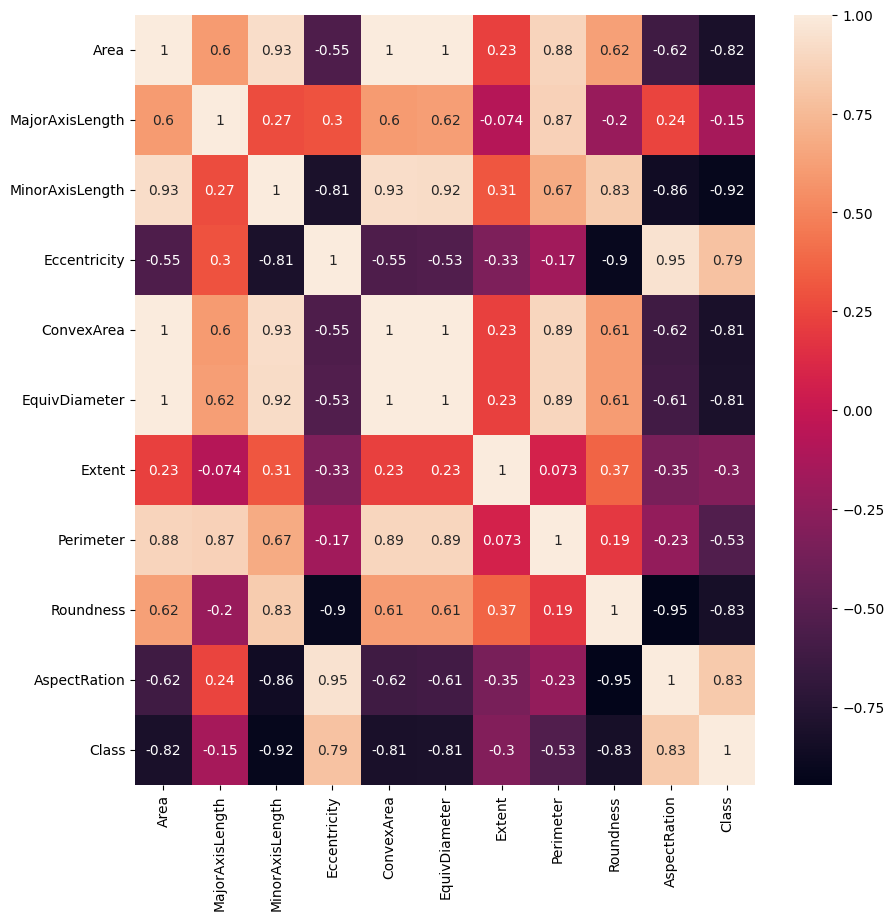

In [ ]:

plt.figure(figsize=(10,10))
sns.heatmap(df2.corr(numeric_only = True), annot=True)
plt.show()

In [ ]:
df2['Class'].replace(1, "Jasmine", inplace=True)
df2['Class'].replace(0, "Gonen", inplace=True)
df2

<ipython-input-10-3a0fe987fe3c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Class'].replace(1, "Jasmine", inplace=True)


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.262097,0.165901,0.614922,0.149139,0.248903,0.337191,0.544960,0.244209,0.807934,0.032371,Jasmine
1,0.045525,0.005123,0.352934,0.168567,0.051726,0.066336,0.655171,0.036283,0.899898,0.037204,Jasmine
2,0.068418,0.019803,0.366292,0.188069,0.065607,0.098164,0.746848,0.041724,0.950265,0.042222,Jasmine
3,0.071670,0.026591,0.363903,0.213671,0.068573,0.102609,0.795277,0.043795,0.952688,0.049077,Jasmine
4,0.152315,0.100769,0.456247,0.250355,0.145094,0.207586,0.767156,0.106958,0.958906,0.059471,Jasmine
...,...,...,...,...,...,...,...,...,...,...,...
18180,0.433273,0.682917,0.345224,0.904994,0.406810,0.517174,0.229182,0.436426,0.669518,0.608684,Gonen
18181,0.658559,0.875159,0.492965,0.905642,0.620121,0.725477,0.524943,0.605115,0.639275,0.610397,Gonen
18182,0.499870,0.739322,0.384251,0.906891,0.468858,0.581631,0.353738,0.466260,0.696071,0.613720,Gonen
18183,0.447190,0.708342,0.354474,0.909189,0.428283,0.530871,0.216874,0.469849,0.630873,0.619915,Gonen


In [ ]:
vals = df2["Class"].unique()
vals

array(['Jasmine', 'Gonen'], dtype=object)

In [ ]:
Nov_col = ['MajorAxisLength','MinorAxisLength', "Eccentricity"]
# MajorAxisLength - длина  MinorAxisLength - ширина
df = df2[Nov_col].copy()
df

,MajorAxisLength,MinorAxisLength,Eccentricity
0,0.165901,0.614922,0.149139
1,0.005123,0.352934,0.168567
2,0.019803,0.366292,0.188069
3,0.026591,0.363903,0.213671
4,0.100769,0.456247,0.250355
...,...,...,...
18180,0.682917,0.345224,0.904994
18181,0.875159,0.492965,0.905642
18182,0.739322,0.384251,0.906891
18183,0.708342,0.354474,0.909189


In [ ]:
X = df
y = df2["Class"].replace(vals, [0, 1]) # целевая
yvals = df2["Class"]

<ipython-input-16-cd54a20c201c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df2["Class"].replace(vals, [0, 1])


## Распространенные алгоритмы кластеризации



### K-Means

In [ ]:
import mpl_toolkits.mplot3d  # noqa: F401
from sklearn.cluster import KMeans

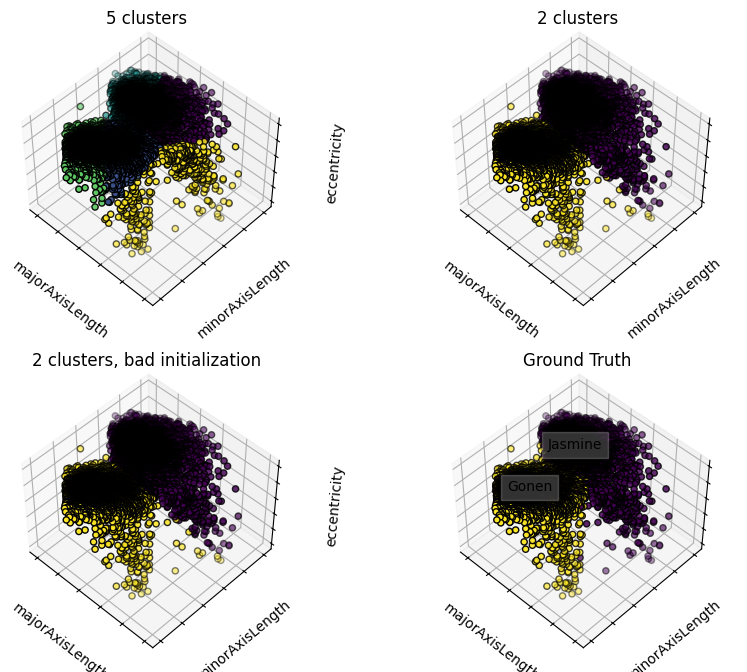

In [ ]:
estimators = [
    ("k_means_rice_5", KMeans(n_clusters=5)),
    ("k_means_rice_2", KMeans(n_clusters=2)),
    ("k_means_rice_bad_init", KMeans(n_clusters=2, n_init=1, init="random")),
]

fig = plt.figure(figsize=(10, 8))
titles = ["5 clusters", "2 clusters", "2 clusters, bad initialization"]
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X["MajorAxisLength"], X["MinorAxisLength"], X["Eccentricity"], c=labels.astype(float), edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("majorAxisLength")
    ax.set_ylabel("minorAxisLength")
    ax.set_zlabel("eccentricity")
    ax.set_title(title)

# Plot the ground truth
ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)

for name, label in [(vals[0], 0), (vals[1], 1)]:
    ds = df2[df2["Class"]==name]
    ax.text3D(
        ds["MajorAxisLength"].mean(),
        ds["MinorAxisLength"].mean(),
        ds["Eccentricity"].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )

ax.scatter(X["MajorAxisLength"], X["MinorAxisLength"], X["Eccentricity"], c=y, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("majorAxisLength")
ax.set_ylabel("minorAxisLength")
ax.set_zlabel("eccentricity")
ax.set_title("Ground Truth")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

In [ ]:
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score


n_clusters = np.arange(2, 21)

In [ ]:
best_metric = [0, 10000, 0,[]]

silhouette_score_values = []
adjusted_rand_score_values = []


for n in n_clusters:

    clusterer = KMeans(n_clusters=n, max_iter=10, n_init=10)
    clusterer.fit(X)
    y_pred = clusterer.predict(X)

    score1 = metrics.silhouette_score(X, y_pred)
    silhouette_score_values.append(score1)

    score2 = metrics.adjusted_rand_score(y, y_pred)
    adjusted_rand_score_values.append(score2)


    if score1 < best_metric[1] and score2 > best_metric[2]:
          best_metric[1] = score1
          best_metric[2] = score2
          best_metric[3] = clusterer.cluster_centers_
          best_metric[0] = n




In [ ]:
best_metric

[2,
 0.6133859144960203,
 0.9234216426757201,
 array([[0.73253166, 0.74798703, 0.72769171],
        [0.69427273, 0.35751667, 0.89644447]])]



0.61 - коэффициент силуэта, качество кластеризации среднее

0.92 - индекс Рэнда, кластеризации идентичны

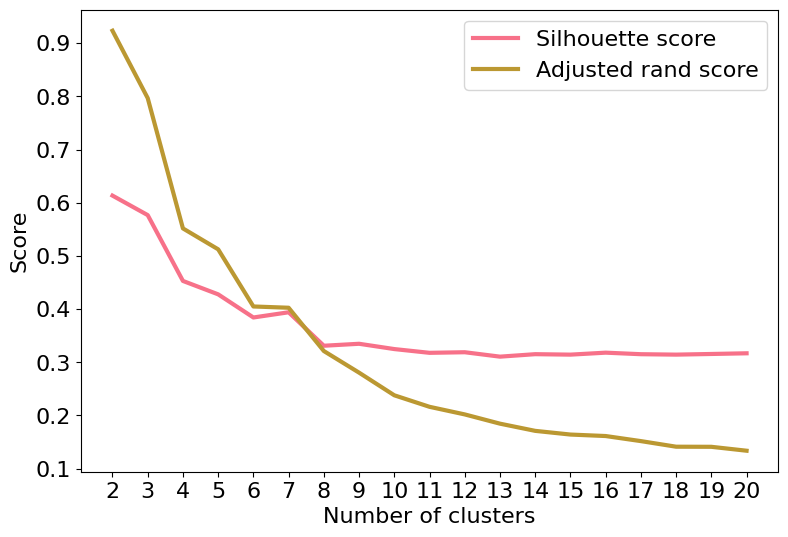

In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(n_clusters, silhouette_score_values, linewidth=3, label='Silhouette score')
plt.plot(n_clusters, adjusted_rand_score_values, linewidth=3, label='Adjusted rand score')
plt.xlabel('Number of clusters', size=16)
plt.ylabel('Score', size=16)
plt.xticks(n_clusters, size=16)
plt.yticks(size=16)
plt.legend(loc='best', fontsize=16)

plt.show()

### Иерархическая кластеризация

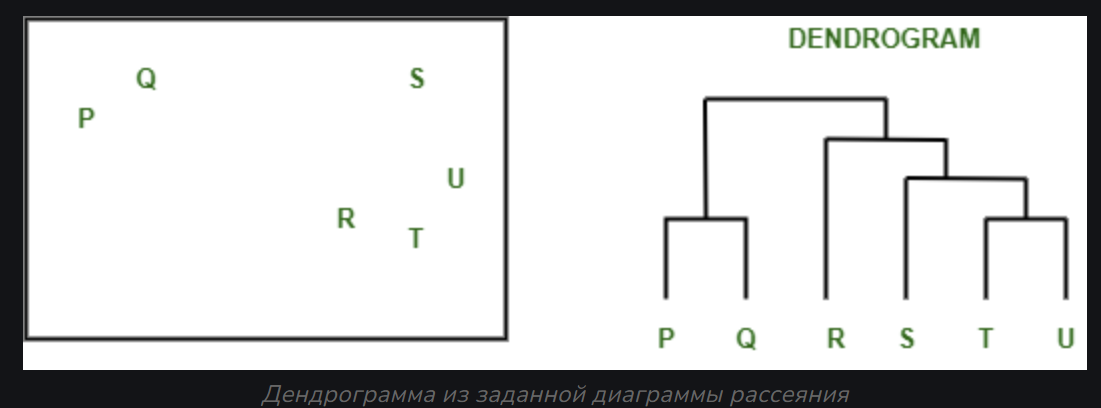

Ветви дендрограммы называются кладами. Эти клады организованы в соответствии с тем, насколько они похожи или различны. Каждая клада дендрограммы имеет один или несколько листьев. P, Q, R, S, T и U являются листьями дендрограммы: Тройной (трехлистный): P, Q, R Двойной (двулистный): S, T Одинарный (simplicifolius): U

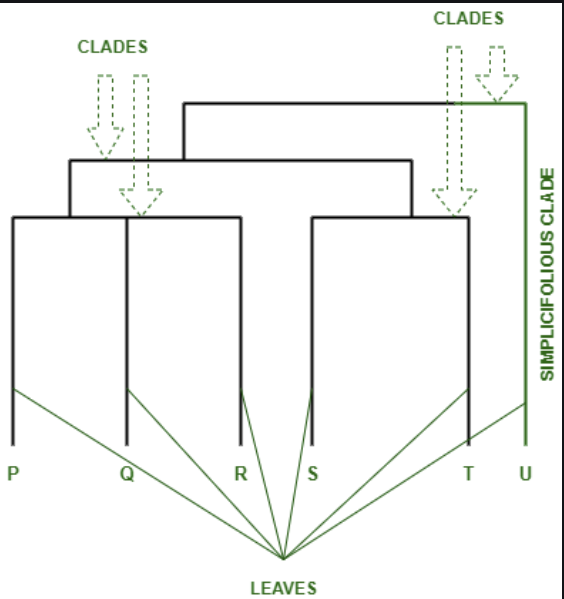

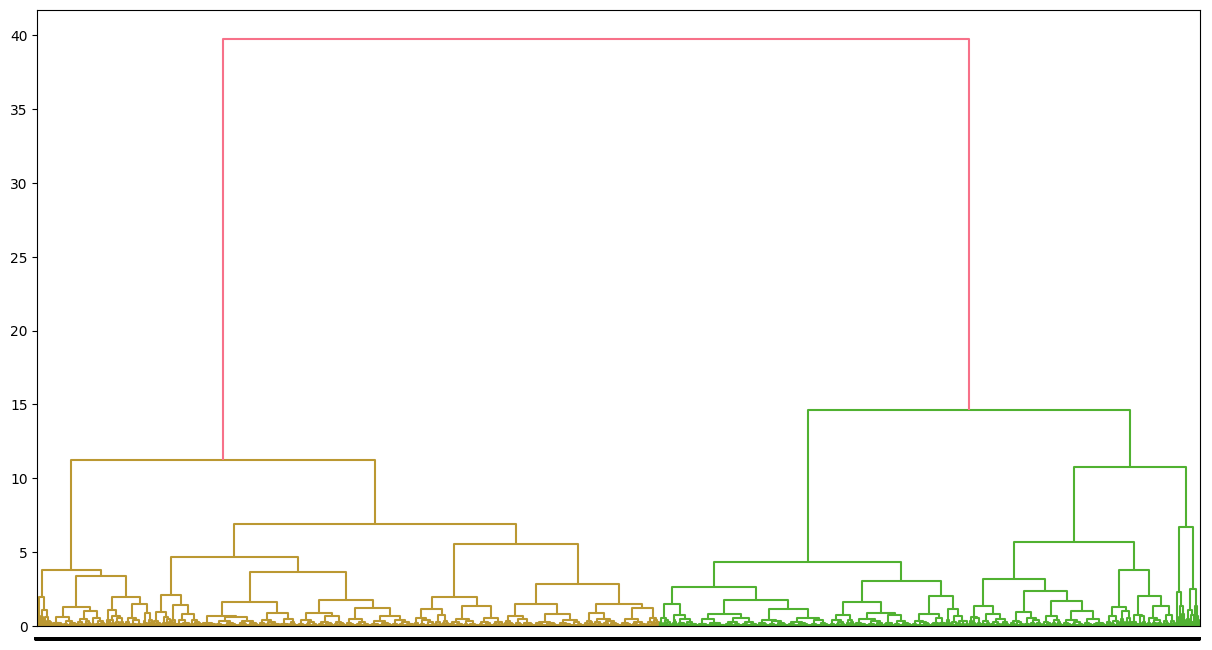

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
samples = df.values

# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method='ward')


plt.figure(figsize=(15, 8))
# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=5,
           )

plt.show()

Параметры, необходимые для алгоритма DBSCAN
1. eps: Он определяет окрестности вокруг точки данных, т.е. если расстояние между двумя точками меньше или равно 'eps', то они считаются соседями. Если значение eps выбрано слишком маленьким, то большая часть данных будет рассматриваться как выброс. Если выбран очень большой, то кластеры объединятся, и большинство точек данных будут находиться в одних и тех же кластерах. Один из способов найти значение eps основан на графике k-расстояния.
1. MinPts: Минимальное количество соседей (точек данных) в радиусе eps. Чем больше набор данных, тем большее значение MinPts должно быть выбрано. Как правило, минимальное количество MinPts может быть получено из числа измерений D в наборе данных следующим образом: MinPts >= D+1. Минимальное значение MinPts должно быть выбрано не менее 3.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [ ]:
mins = X.shape[1]

['y', 'b']


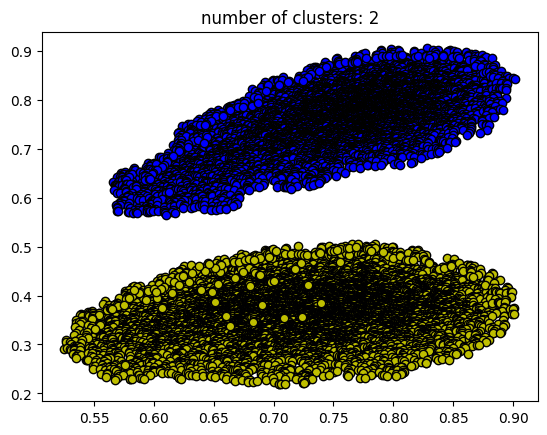

In [ ]:
db = DBSCAN(eps=0.02, min_samples=50).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b']
print(colors)
for k, col in zip(unique_labels, colors):
	if k == -1:
		# Black used for noise.
		col = 'k'

	class_member_mask = (labels == k)

	xy = X[class_member_mask & core_samples_mask]
	plt.plot(xy["MajorAxisLength"], xy["MinorAxisLength"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

	xy = X[class_member_mask & ~core_samples_mask]
	plt.plot(xy["MajorAxisLength"], xy["MinorAxisLength"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()

Черные точки - это выбросы. Меняя значение eps и min_samples, мы можем контролировать результат работы алгоритма

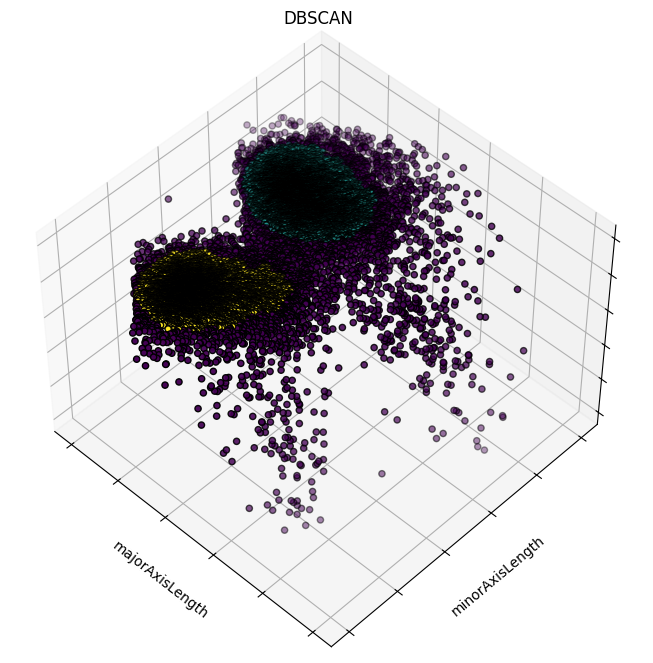

In [ ]:

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection="3d", elev=48, azim=134)

ax.scatter(X["MajorAxisLength"], X["MinorAxisLength"], X["Eccentricity"], c=labels.astype(float), edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("majorAxisLength")
ax.set_ylabel("minorAxisLength")
ax.set_zlabel("eccentricity")
ax.set_title("DBSCAN")

plt.show()

Для оценки алгоритмов кластеризации мы будем использовать оценку силуэта и оценку скорректированного рэнда. Оценка Silhouette находится в диапазоне от -1 до 1. Оценка около 1 означает, что точка данных i очень компактна в пределах кластера, к которому она принадлежит, и удалена от других кластеров. Худшее значение — -1. Значения, близкие к 0, обозначают перекрывающиеся кластеры.

Абсолютный показатель Rand Score находится в диапазоне от 0 до 1. Больше 0,9 означает отличное кластерное восстановление, а выше 0,8 — хорошее восстановление. Менее 0,5 считается плохим восстановлением.

In [ ]:
# evaluation metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = adjusted_rand_score(y, labels)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:0.50
Adjusted Rand Index: 0.68


 Silhouette = 0.50 обозначает что точка данных компактна в пределах кластера.

 Adjusted Rand Index: 0.68 - нормальное кластерное восстановление
